In [1]:
# Imports
# import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# map_data = gpd.read_file('/GitHub/NEXTTRIP/flask_LocationModel/data/uber-raw-data-apr14.csv')

In [3]:
# Load the dataset
data = pd.read_csv('/GitHub/NEXTTRIP/flask_LocationModel/data/uber-raw-data-apr14.csv')

In [4]:
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [5]:
df = pd.DataFrame(data)

In [6]:
# Step 2: Preprocess the data
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

In [7]:
# Step 3: Feature Engineering
data['weekday'] = data['Date/Time'].dt.weekday
data['hour'] = data['Date/Time'].dt.hour

In [8]:
data.head()

,Date/Time,Lat,Lon,Base,weekday,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,0


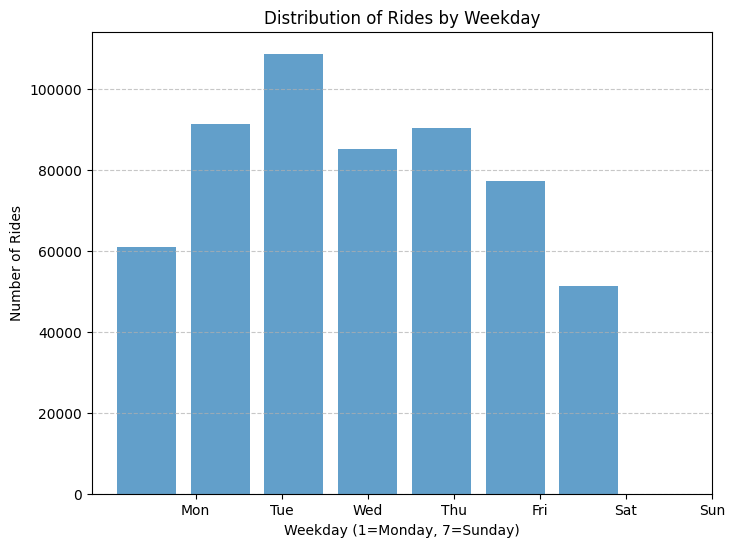

In [9]:
# Plot a histogram of rides by weekday
plt.figure(figsize=(8, 6))
df['weekday'].plot(kind='hist', rwidth=0.8, bins=7, alpha=0.7)
plt.title('Distribution of Rides by Weekday')
plt.xlabel('Weekday (1=Monday, 7=Sunday)')
plt.ylabel('Number of Rides')
plt.xticks(range(1, 8), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

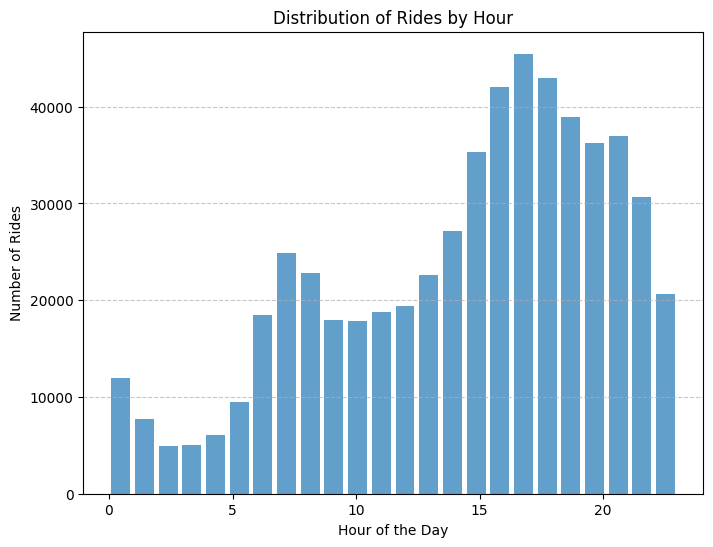

In [10]:
# Plot a histogram of rides by hour
plt.figure(figsize=(8, 6))
df['hour'].plot(kind='hist', rwidth=0.8, bins=24, alpha=0.7)
plt.title('Distribution of Rides by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [16]:
data.head()

,Date/Time,Lat,Lon,Base,weekday,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,0


In [18]:
#  aggregating the data to count how many times each combination of latitude, longitude, weekday, and hour appears.
heatmap_data=df.groupby(['Lat','Lon','weekday','hour']).size().reset_index(name='weight')

In [22]:
heatmap_data

,Lat,Lon,weekday,hour,weight
0,40.0729,-74.1638,1,14,1
1,40.1918,-74.6036,0,10,1
2,40.2026,-74.1224,2,16,1
3,40.2168,-74.5670,0,18,1
4,40.2259,-74.6235,2,21,1
...,...,...,...,...,...
521103,41.3730,-72.9237,0,5,1
521104,41.3737,-73.7988,1,16,1
521105,41.5016,-72.8987,4,14,1
521106,41.5276,-72.7734,4,10,2


In [25]:
csv_filepath = '/GitHub/NEXTTRIP/flask_LocationModel/data/heatmap_data.csv'
heatmap_data.to_csv(csv_filepath, index=False)

In [11]:
import folium

In [12]:
# Initialize a map centered around a location (e.g., New York City)
map_center = [40.7128, -74.0060]  # Latitude and longitude of NYC

In [13]:
# Create a Folium map
m = folium.Map(location=map_center, zoom_start=12)

In [14]:
# Add markers for each ride location
for index, row in df.iterrows():
    lat, lon = row['Lat'], row['Lon']
    popup_text = f"Date/Time: {row['Date/Time']}<br>Base: {row['Base']}"
    folium.Marker([lat, lon], popup=popup_text).add_to(m)

In [15]:
# Display the map
m.save('ride_locations.png')  # Save the map to an HTML file

KeyboardInterrupt: 

In [ ]:
import imgkit

In [ ]:
image_filename = 'ride_locations.png'
imgkit.from_string(m.get_root().render(), image_filename)

OSError: 
No wkhtmltoimage executable found: "command not found"
If this file exists please check that this process can read it.
Otherwise please install wkhtmltopdf - http://wkhtmltopdf.org

        